## Prim MST

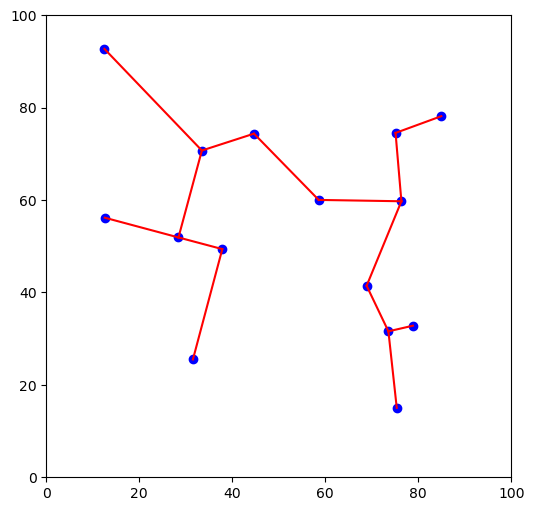

In [5]:
import tkinter as tk
import numpy as np
from scipy.spatial import distance_matrix
from queue import PriorityQueue
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Prim 알고리즘을 사용하여 MST를 구하는 함수
def prim_mst_stepwise(points):
    n = len(points)
    dist_matrix = distance_matrix(points, points)
    
    mst_edges = []
    in_mst = [False] * n
    edge_queue = PriorityQueue()
    
    in_mst[0] = True
    for j in range(1, n):
        edge_queue.put((dist_matrix[0][j], 0, j))
    
    step_by_step_edges = []
    
    while len(mst_edges) < n - 1:
        weight, u, v = edge_queue.get()
        if not in_mst[v]:
            in_mst[v] = True
            mst_edges.append((u, v))
            step_by_step_edges.append(list(mst_edges))  # 각 단계를 저장
            for w in range(n):
                if not in_mst[w]:
                    edge_queue.put((dist_matrix[v][w], v, w))
    
    return step_by_step_edges

# 하나의 창에서 단계별로 트리를 업데이트하는 함수
def plot_mst_step(points, mst_edges, canvas, ax):
    ax.clear()  # 기존 플롯을 지움
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    
    # 점들 그리기
    for point in points:
        ax.scatter(point[0], point[1], color='blue')

    # MST 간선 그리기 (현재 단계까지)
    for u, v in mst_edges:
        p1, p2 = points[u], points[v]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color='red')

    canvas.draw()  # 캔버스를 업데이트

# Prim 알고리즘 단계를 하나의 창에서 업데이트하는 함수
def show_mst_in_window(points, steps, canvas, ax):
    def update_step(step=0):
        if step < len(steps):
            plot_mst_step(points, steps[step], canvas, ax)
            root.after(1000, update_step, step + 1)  # 1초 후 다음 단계로 업데이트
    
    update_step()  # 첫 단계 실행

# 버튼을 눌렀을 때 실행되는 함수
def on_button_click():
    try:
        num_points = int(entry.get())
        if num_points < 2:
            raise ValueError
    except ValueError:
        result_label.config(text="올바른 숫자를 입력하세요.")
        return
    
    # 점들을 무작위로 생성 (0, 100) 범위 안에서
    points = np.random.rand(num_points, 2) * 100
    
    # Prim 알고리즘으로 각 단계별 MST 계산
    step_by_step_edges = prim_mst_stepwise(points)

    # 그래프가 이미 존재할 경우 초기화
    global canvas, ax
    if canvas:
        canvas.get_tk_widget().pack_forget()  # 이전 캔버스 지움
    fig, ax = plt.subplots(figsize=(6, 6))
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.get_tk_widget().pack()

    # 단계별로 트리 시각화 업데이트
    show_mst_in_window(points, step_by_step_edges, canvas, ax)

# Tkinter로 GUI 설정
root = tk.Tk()
root.title("Prim's MST Step-by-Step Visualizer")

# 사용자 입력을 위한 GUI 요소들
label = tk.Label(root, text="점의 개수를 입력하세요:")
label.pack()

entry = tk.Entry(root)
entry.pack()

button = tk.Button(root, text="생성", command=on_button_click)
button.pack()

result_label = tk.Label(root, text="")
result_label.pack()

# 초기 캔버스 및 ax 객체
canvas = None
ax = None

# 메인 루프 시작
root.mainloop()


### Kruskal MST

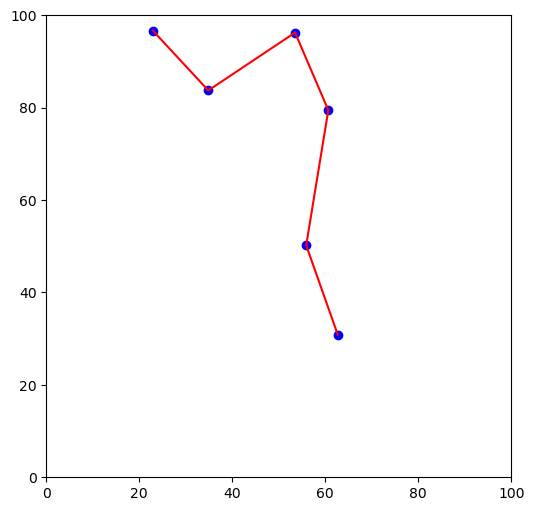

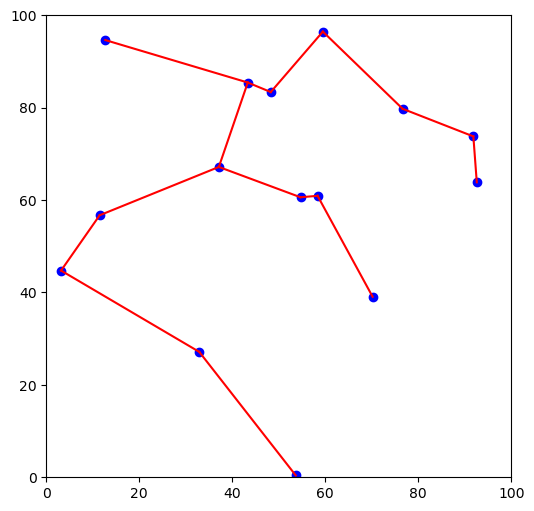

In [6]:
import tkinter as tk
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Union-Find (Disjoint Set Union) 구현
class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [1] * n
    
    def find(self, p):
        if self.parent[p] != p:
            self.parent[p] = self.find(self.parent[p])
        return self.parent[p]
    
    def union(self, p, q):
        rootP = self.find(p)
        rootQ = self.find(q)
        if rootP != rootQ:
            if self.rank[rootP] > self.rank[rootQ]:
                self.parent[rootQ] = rootP
            elif self.rank[rootP] < self.rank[rootQ]:
                self.parent[rootP] = rootQ
            else:
                self.parent[rootQ] = rootP
                self.rank[rootP] += 1

# Kruskal 알고리즘을 사용하여 MST를 구하는 함수
def kruskal_mst_stepwise(points):
    n = len(points)
    dist_matrix = distance_matrix(points, points)
    
    # 모든 간선을 거리 순으로 정렬
    edges = [(dist_matrix[i][j], i, j) for i in range(n) for j in range(i + 1, n)]
    edges.sort()

    uf = UnionFind(n)
    mst_edges = []
    step_by_step_edges = []
    
    for weight, u, v in edges:
        if uf.find(u) != uf.find(v):  # 사이클을 만들지 않는 경우에만 간선 추가
            uf.union(u, v)
            mst_edges.append((u, v))
            step_by_step_edges.append(list(mst_edges))  # 각 단계를 저장
        if len(mst_edges) == n - 1:  # MST 완성 시 종료
            break
    
    return step_by_step_edges

# 하나의 창에서 단계별로 트리를 업데이트하는 함수
def plot_mst_step(points, mst_edges, canvas, ax):
    ax.clear()  # 기존 플롯을 지움
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    
    # 점들 그리기
    for point in points:
        ax.scatter(point[0], point[1], color='blue')

    # MST 간선 그리기 (현재 단계까지)
    for u, v in mst_edges:
        p1, p2 = points[u], points[v]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color='red')

    canvas.draw()  # 캔버스를 업데이트

# Kruskal 알고리즘 단계를 하나의 창에서 업데이트하는 함수
def show_mst_in_window(points, steps, canvas, ax):
    def update_step(step=0):
        if step < len(steps):
            plot_mst_step(points, steps[step], canvas, ax)
            root.after(1000, update_step, step + 1)  # 1초 후 다음 단계로 업데이트
    
    update_step()  # 첫 단계 실행

# 버튼을 눌렀을 때 실행되는 함수
def on_button_click():
    try:
        num_points = int(entry.get())
        if num_points < 2:
            raise ValueError
    except ValueError:
        result_label.config(text="올바른 숫자를 입력하세요.")
        return
    
    # 점들을 무작위로 생성 (0, 100) 범위 안에서
    points = np.random.rand(num_points, 2) * 100
    
    # Kruskal 알고리즘으로 각 단계별 MST 계산
    step_by_step_edges = kruskal_mst_stepwise(points)

    # 그래프가 이미 존재할 경우 초기화
    global canvas, ax
    if canvas:
        canvas.get_tk_widget().pack_forget()  # 이전 캔버스 지움
    fig, ax = plt.subplots(figsize=(6, 6))
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.get_tk_widget().pack()

    # 단계별로 트리 시각화 업데이트
    show_mst_in_window(points, step_by_step_edges, canvas, ax)

# Tkinter로 GUI 설정
root = tk.Tk()
root.title("Kruskal's MST Step-by-Step Visualizer in One Window")

# 사용자 입력을 위한 GUI 요소들
label = tk.Label(root, text="점의 개수를 입력하세요:")
label.pack()

entry = tk.Entry(root)
entry.pack()

button = tk.Button(root, text="생성", command=on_button_click)
button.pack()

result_label = tk.Label(root, text="")
result_label.pack()

# 초기 캔버스 및 ax 객체
canvas = None
ax = None

# 메인 루프 시작
root.mainloop()


### 동시에 보여주는 코드

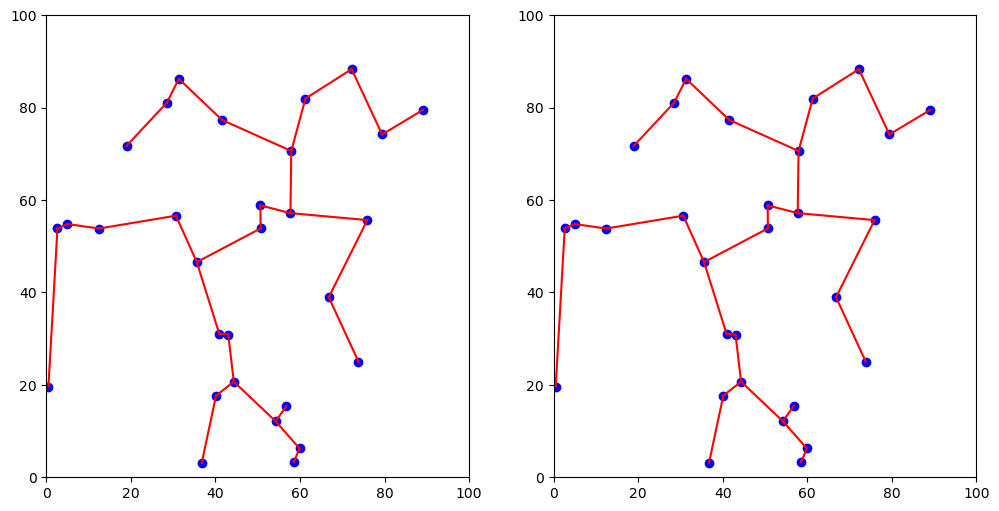

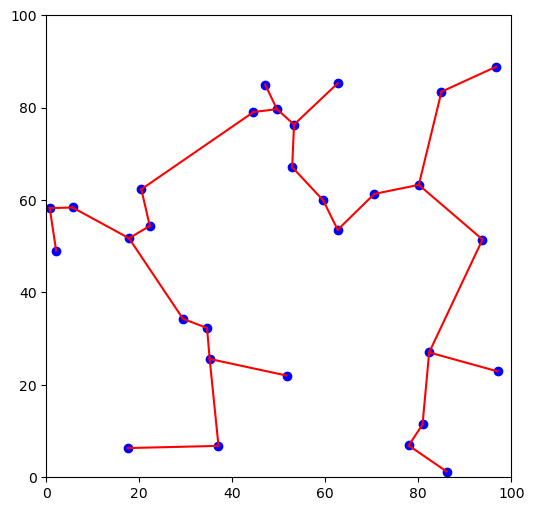

In [15]:
import tkinter as tk
import numpy as np
from scipy.spatial import distance_matrix
from queue import PriorityQueue
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Union-Find (Disjoint Set Union) 구현
class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [1] * n
    
    def find(self, p):
        if self.parent[p] != p:
            self.parent[p] = self.find(self.parent[p])
        return self.parent[p]
    
    def union(self, p, q):
        rootP = self.find(p)
        rootQ = self.find(q)
        if rootP != rootQ:
            if self.rank[rootP] > self.rank[rootQ]:
                self.parent[rootQ] = rootP
            elif self.rank[rootP] < self.rank[rootQ]:
                self.parent[rootP] = rootQ
            else:
                self.parent[rootQ] = rootP
                self.rank[rootP] += 1

# Kruskal 알고리즘을 사용하여 MST를 구하는 함수
def kruskal_mst_stepwise(points):
    n = len(points)
    dist_matrix = distance_matrix(points, points)
    
    edges = [(dist_matrix[i][j], i, j) for i in range(n) for j in range(i + 1, n)]
    edges.sort()

    uf = UnionFind(n)
    mst_edges = []
    step_by_step_edges = []
    
    for weight, u, v in edges:
        if uf.find(u) != uf.find(v):
            uf.union(u, v)
            mst_edges.append((u, v))
            step_by_step_edges.append(list(mst_edges))
        if len(mst_edges) == n - 1:
            break
    
    return step_by_step_edges

# Prim 알고리즘을 사용하여 MST를 구하는 함수
def prim_mst_stepwise(points):
    n = len(points)
    dist_matrix = distance_matrix(points, points)
    
    mst_edges = []
    in_mst = [False] * n
    edge_queue = PriorityQueue()
    
    in_mst[0] = True
    for j in range(1, n):
        edge_queue.put((dist_matrix[0][j], 0, j))
    
    step_by_step_edges = []
    
    while len(mst_edges) < n - 1:
        weight, u, v = edge_queue.get()
        if not in_mst[v]:
            in_mst[v] = True
            mst_edges.append((u, v))
            step_by_step_edges.append(list(mst_edges))
            for w in range(n):
                if not in_mst[w]:
                    edge_queue.put((dist_matrix[v][w], v, w))
    
    return step_by_step_edges

# 트리를 단계별로 그리는 함수
def plot_mst_step(points, mst_edges, ax):
    ax.clear()
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    
    for point in points:
        ax.scatter(point[0], point[1], color='blue')

    for u, v in mst_edges:
        p1, p2 = points[u], points[v]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color='red')

# Kruskal 또는 Prim 알고리즘을 단계별로 보여주는 함수
def show_mst_in_window(points, steps, canvas, ax):
    def update_step(step=0):
        if step < len(steps):
            plot_mst_step(points, steps[step], ax)
            canvas.draw()  # 반드시 매번 그리기
            root.after(1000, update_step, step + 1)
    
    update_step()

# 버튼을 눌렀을 때 실행되는 함수
def on_button_click(algorithm):
    try:
        num_points = int(entry.get())
        if num_points < 2:
            raise ValueError
    except ValueError:
        result_label.config(text="올바른 숫자를 입력하세요.")
        return
    
    points = np.random.rand(num_points, 2) * 100
    
    if algorithm == 'kruskal':
        step_by_step_edges = kruskal_mst_stepwise(points)
    elif algorithm == 'prim':
        step_by_step_edges = prim_mst_stepwise(points)

    global canvas, ax
    if canvas:
        canvas.get_tk_widget().pack_forget()
    fig, ax = plt.subplots(figsize=(6, 6))
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.get_tk_widget().pack()

    show_mst_in_window(points, step_by_step_edges, canvas, ax)

# Both 버튼을 눌렀을 때 실행되는 함수 (하나의 창에서 Kruskal과 Prim 동시에)
def on_both_button_click():
    try:
        num_points = int(entry.get())
        if num_points < 2:
            raise ValueError
    except ValueError:
        result_label.config(text="올바른 숫자를 입력하세요.")
        return
    
    points = np.random.rand(num_points, 2) * 100
    
    kruskal_steps = kruskal_mst_stepwise(points)
    prim_steps = prim_mst_stepwise(points)

    global canvas, ax1, ax2
    if canvas:
        canvas.get_tk_widget().pack_forget()
    
    # 하나의 창에 두 개의 subplot 생성
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.get_tk_widget().pack()

    ax1.set_title("Kruskal Algorithm")
    ax2.set_title("Prim Algorithm")
    
    # Kruskal과 Prim을 각각 subplot에 단계별로 표시
    def update_both_steps(step=0):
        if step < len(kruskal_steps):
            plot_mst_step(points, kruskal_steps[step], ax1)
        if step < len(prim_steps):
            plot_mst_step(points, prim_steps[step], ax2)
        canvas.draw()  # 반드시 매번 그리기
        if step < len(kruskal_steps) or step < len(prim_steps):
            root.after(1000, update_both_steps, step + 1)
    
    update_both_steps()
    
# Tkinter로 GUI 설정
root = tk.Tk()
root.title("MST Step-by-Step Visualizer")

label = tk.Label(root, text="점의 개수를 입력하세요:")
label.pack()

entry = tk.Entry(root)
entry.pack()

# Kruskal, Prim, Both 버튼 추가
kruskal_button = tk.Button(root, text="Kruskal", command=lambda: on_button_click('kruskal'))
kruskal_button.pack()

prim_button = tk.Button(root, text="Prim", command=lambda: on_button_click('prim'))
prim_button.pack()

both_button = tk.Button(root, text="Both", command=on_both_button_click)
both_button.pack()

result_label = tk.Label(root, text="")
result_label.pack()

canvas = None
ax1, ax2 = None, None

root.mainloop()
